<a href="https://colab.research.google.com/github/Mohammed-khair/sign-language-identifier-Keras/blob/main/Mini_sign_language_identifier_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a sign lnguage symbol identifier using CNN and Tenserflow Keras functional API

This project was done as an excercise in the following course [Coursera: Convolutional neural network](https://www.coursera.org/learn/convolutional-neural-networks)

In this project we will build a sign lnguage symbol classifier that can recognizes upto 6 different hand signs.

We will be using Tenserflow Keras Functional API to program the model.

The model architecture will use convolutional neural networks (CNN).

In [1]:
import math
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

### Load the Data and Split the Data into Train/Test Sets

In [2]:
#Load the training set
train_dataset = h5py.File('/content/train_signs.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

#Load the testing set
test_dataset = h5py.File('/content/test_signs.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

#Load the list of classes
classes = np.array(test_dataset["list_classes"][:]) # the list of classes

View 6 examples of the data

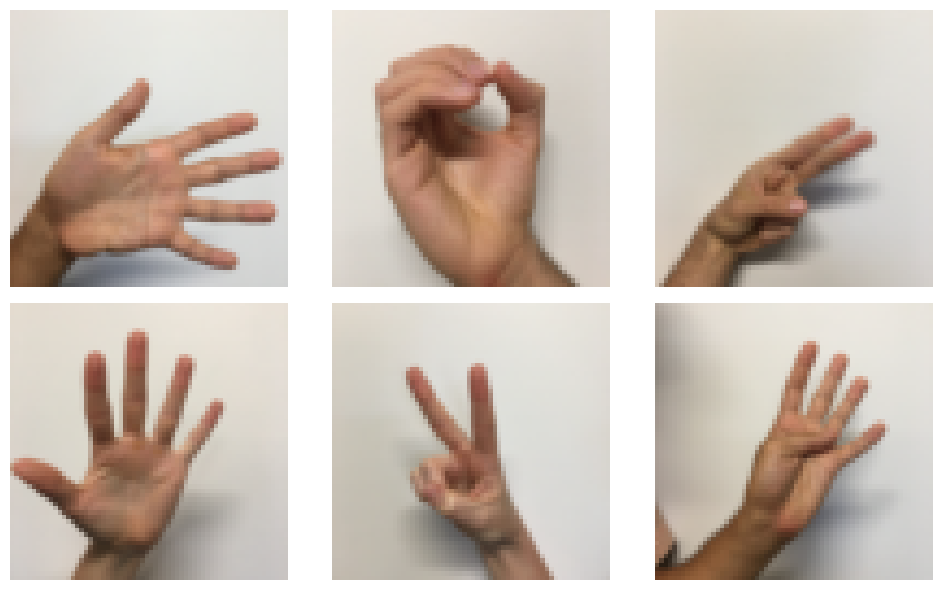

In [3]:
# Number of images you want to display
num_images_to_display = 6

# Randomly select six images from the list
images_list = X_train_orig[:num_images_to_display]

# Create a subplot grid to display multiple images
rows = 2  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure and axes using matplotlib
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# Flatten the axes array to iterate through the subplots easily
axes = axes.flatten()

# Loop through the images and display them on the subplots
for i, image_array in enumerate(images_list):
    axes[i].imshow(image_array)
    axes[i].axis('off')  # Turn off axis ticks and labels for cleaner display

# Adjust the layout to avoid overlapping and improve visualization
plt.tight_layout()

# Show the plot with all the images
plt.show()

In [4]:
Y_train_orig[0] # view an example of the y training set

5

Normalize the input image vectors and reshape the output vectors

In [10]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Determine the number of classes
num_classes = np.max(Y_train_orig) + 1

# One-hot encode the y dataset
Y_train = np.eye(num_classes)[Y_train_orig]
Y_test = np.eye(num_classes)[Y_test_orig]

Print the shape of the training sets

In [11]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


Implement the `convolutional_model` that has following architecture: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`

In [13]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    #input layer
    input_img = tf.keras.Input(shape=input_shape)

    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(filters=8 , kernel_size= (4, 4) , padding='SAME')(input_img)

    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)

    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)

    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(filters=16 , kernel_size= (2, 2), strides=(1, 1), padding='SAME')(P1)

    ## RELU
    A2 = tf.keras.layers.ReLU()(Z2)

    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)

    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)

    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    outputs = outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

Compile the model and use ***Adam*** optimizer and the ***categorical crossentropy*** loss

In [14]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

### Train the model

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 5s 135ms/step - loss: 1.8294 - accuracy: 0.1685 - val_loss: 1.7951 - val_accuracy: 0.2500
Epoch 2/100
17/17 [==============================] - 2s 125ms/step - loss: 1.7930 - accuracy: 0.2278 - val_loss: 1.7881 - val_accuracy: 0.2833
Epoch 3/100
17/17 [==============================] - 2s 120ms/step - loss: 1.7877 - accuracy: 0.2102 - val_loss: 1.7852 - val_accuracy: 0.1750
Epoch 4/100
17/17 [==============================] - 3s 209ms/step - loss: 1.7850 - accuracy: 0.2074 - val_loss: 1.7813 - val_accuracy: 0.2083
Epoch 5/100
17/17 [==============================] - 2s 125ms/step - loss: 1.7821 - accuracy: 0.2019 - val_loss: 1.7773 - val_accuracy: 0.2500
Epoch 6/100
17/17 [==============================] - 2s 123ms/step - loss: 1.7791 - accuracy: 0.2519 - val_loss: 1.7742 - val_accuracy: 0.3083
Epoch 7/100
17/17 [==============================] - 2s 121ms/step - loss: 1.7756 - accuracy: 0.2917 - val_loss: 1.7707 - val_accuracy: 0.3000

### visualize the loss over time

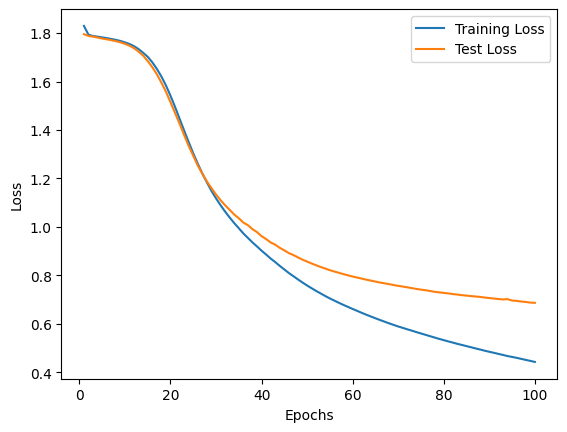

In [16]:
# Access the loss values from the training history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create a list of epoch numbers
epochs = range(1, 101)

# Plot the training and test loss over time
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### visualize the accuracy over time

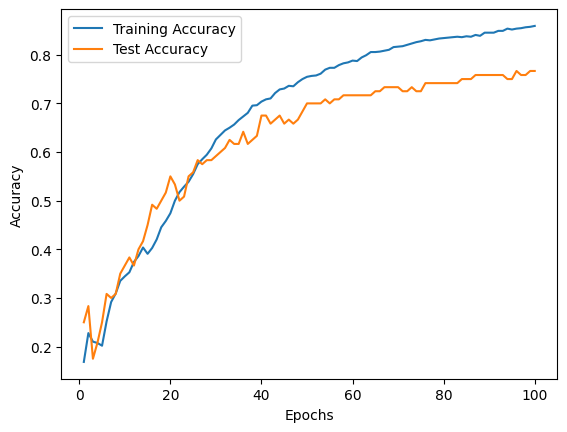

In [17]:
# Access the accuracy values from the training history
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Plot the training and test accuracy over time
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()